<a href="https://colab.research.google.com/github/Yashmaini30/My_Own_Linear_Regression/blob/main/My_Own_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score, mean_squared_error

np.random.seed(42)

samples=100000

X=10*np.random.rand(samples,1)

y=(3*X) + 2 + np.random.randn(samples,1)

df=pd.DataFrame(np.hstack((X,y)),columns=['Features_X','Target_y'])

print(df)
df.to_csv('sample_data_for_SLR(1 feature).csv',index=False)

       Features_X   Target_y
0        3.745401  14.078915
1        9.507143  33.045316
2        7.319939  23.859687
3        5.986585  17.762150
4        1.560186   8.105907
...           ...        ...
99995    7.923048  26.356608
99996    7.792529  24.012205
99997    6.744534  22.534421
99998    4.994472  18.123494
99999    3.899085  14.806262

[100000 rows x 2 columns]


In [5]:
df=pd.read_csv('sample_data_for_SLR(1 feature).csv')
# print(df.head)

#extract features
X=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values.reshape(-1,1)

[[3.74540119]
 [9.50714306]
 [7.31993942]
 ...
 [6.74453407]
 [4.99447245]
 [3.89908485]]


#### formula to calculate the optimal parameters (weights) for linear regression using the Hat Matrix equation.
#### It minimizes the sum of squared errors between predicted and actual values.

# θ = (X^T * X)^-1 * X^T * y

#### Where:
#### - θ: Optimal parameters (weights).
#### - X: Design matrix (feature values with an added column of 1s for the intercept).
#### - X^T: Transpose of X.
#### - y: Target values.
#### - (X^T * X)^-1: Inverse of (X^T * X).

Closed-Form Solution: Intercept = 1.9998, Slope = 3.0006


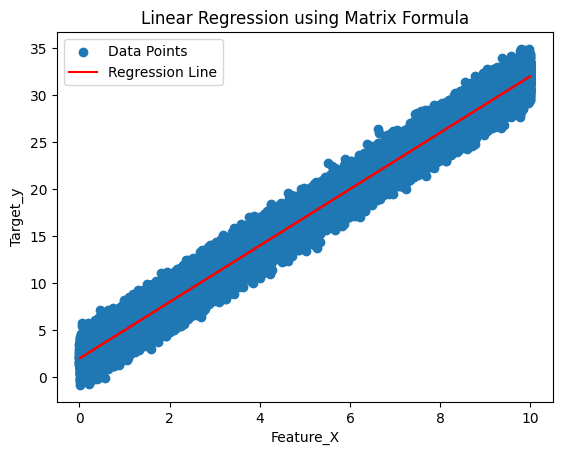

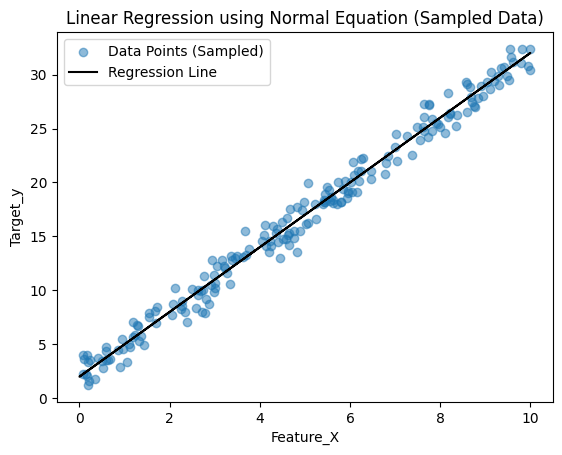

R-squared: 0.99
Mean Squared Error: 1.00


In [18]:
df=pd.read_csv('sample_data_for_SLR(1 feature).csv')

# Extract features and target
X=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values.reshape(-1,1)

# Add bias term or 1's coloumn
X_b = np.c_[np.ones((X.shape[0], 1)), X]

####Calculate the optimal parameters
# Calculate X transpose * X
XTX = X_b.T.dot(X_b)

# Calculate the inverse
XTX_inv = np.linalg.inv(XTX)

# Calculate (X transpose * y)
XTy = X_b.T.dot(y)

# calculate theta_best
theta_best = XTX_inv.dot(XTy)

# Extract learned parameters
b_best, m_best = theta_best.flatten()
print(f"Closed-Form Solution: Intercept = {b_best:.4f}, Slope = {m_best:.4f}")

# Plot result
plt.scatter(X, y, label="Data Points")
plt.plot(X, X_b.dot(theta_best), color='red', label="Regression Line")
plt.xlabel("Feature_X")
plt.ylabel("Target_y")
plt.title("Linear Regression using Matrix Formula")
plt.legend()
plt.show()

# For 100 random sampls
sample_indices = random.sample(range(len(X)), 200)
plt.scatter(X[sample_indices], y[sample_indices], label="Data Points (Sampled)", alpha=0.5)
plt.plot(X, X_b.dot(theta_best), color='black', label="Regression Line")
plt.xlabel("Feature_X")
plt.ylabel("Target_y")
plt.title("Linear Regression using Normal Equation (Sampled Data)")
plt.legend()
plt.show()

# Evaluate the model
y_pred = X_b.dot(theta_best)

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.2f}")

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")